In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [1]:
def load_test_file(file):
    df = pd.read_csv(file)

    #Train data
    X = df[df.columns[1:-6]] #needs to change
    X = X.astype('float64')

    #define y
    y = df.solubility #needs to change
    print(X.shape)
    print(y.shape)
    return X, y

def load_train_file(file):
    df = pd.read_csv(file)

    #Train data
    X = df[df.columns[1:-6]] #needs to change
    X = X.astype('float64')

    #define y
    y = df.solubility #needs to change
    print(X.shape)
    print(y.shape)
    return X, y


In [ ]:
#SVM Linear

#Hyper parameter optimization
#C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10]
epsilon_range = [0, 0.01, 0.1, 0.5, 1, 2, 4]
param_dict = {"C":C_range, "epsilon":epsilon_range}

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

#define model
model = SVR(kernel='linear')

#grid search CV
grid_search = GridSearchCV(model, param_grid=param_dict, cv=5, refit=True, scoring='accuracy', verbose=10, n_jobs=-1)
m_f = grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, m_f.decision_function(X_test))

print('Accuracy: ', acc)
print('Area Under the Curve: ', auc)
print('Best C: ', grid_search.best_params_['C'])
print('best_estimator_', grid_search.best_estimator_)
print('best_score_', grid_search.best_score_)
print('best_params_', grid_search.best_params_)
print('best_index_', grid_search.best_index_)
print('scorer_', grid_search.scorer_)
print('n_splits_', grid_search.n_splits_)
print('refit_time_', grid_search.refit_time_)
print('multimetric_', grid_search.multimetric_)
print(grid_search.cv_results_['params'][grid_search.best_index_])
plot_roc_curve(grid_search, X_test, y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(y_test, y_pred, target_names=target_names)
print(rep)

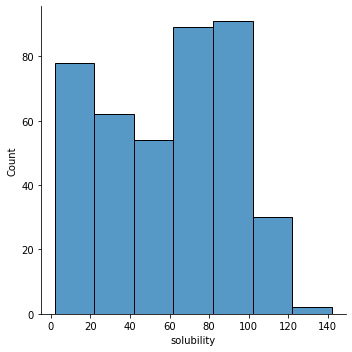

In [10]:
#checking the distribution 
d = pd.read_csv('solubility_values.csv')
d.solubility
sns.displot(d, x="solubility", binwidth=20)

In [ ]:
# Random Forest

max_depth = list(range(1,11))
min_samples_leaf = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
param_dict = {"max_depth":max_depth, 'min_samples_leaf': min_samples_leaf}
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
RFmodel = RandomForestRegressor(n_estimators=100, criterion='mse', min_samples_split=2, 
                                 max_features='sqrt', max_leaf_nodes=None)
grid_search = GridSearchCV(RFmodel, param_grid=param_dict, cv=5, refit=True, scoring='accuracy', verbose=50, n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

print('best_estimator_', grid_search.best_estimator_)
print('best_score_', grid_search.best_score_)
print('best_params_', grid_search.best_params_)
print('best_index_', grid_search.best_index_)
print('scorer_', grid_search.scorer_)
print('n_splits_', grid_search.n_splits_)
print('refit_time_', grid_search.refit_time_)
print('multimetric_', grid_search.multimetric_)
print(grid_search.cv_results_['params'][grid_search.best_index_])
plot_roc_curve(grid_search, X_test, y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(y_test, y_pred, target_names=target_names)
print(rep)